In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

In [3]:
%%time
query = """
select ilink,
count(*) as N_Pants2018 
from jjill.jjill_keyed_data
where is_emailable_ind='Y'
and department_name = 'Pants'
and order_date between '2018-01-01' and '2018-04-30'
group by 1 order by 1;
"""
DF3 = dbu.get_df_from_query(query)
DF3.columns = map(str.upper,DF3.columns)

CPU times: user 310 ms, sys: 144 ms, total: 455 ms
Wall time: 3.54 s


In [4]:
DF1 = pd.read_pickle('../data/numeric_ft_q22017.pkl')
DF2 = pd.read_pickle('../data/categorical_Q22017.pkl')
DF1.columns = map(str.upper, DF1.columns)
DF2.columns = map(str.upper, DF2.columns)

In [5]:
DF = DF1.merge(DF2,on=['ILINK','DEPARTMENT_NAME'])
DF = DF.merge(DF3,how='outer',on='ILINK')

In [6]:
DF['N_PANTS2018'].fillna(0,inplace=True)

In [7]:
print DF.shape
DF.head(5)

(754513, 76)


,ILINK,DEPARTMENT_NAME,TOTAL_BOUGHT,SHIPPED_SOLD_AMT,AVG_SHIPPED_SOLD_AMT,STD_SHIPPED_SOLD_AMT,VAR_SHIPPED_SOLD_AMT,DISCOUNT,AVG_DISCOUNT,STD_DISCOUNT,VAR_DISCOUNT,ENDUSE_HAS_CORE,ENDUSE_HAS_PUREJILL,ENDUSE_HAS_WEAREVER,MASTERCHANNEL_HAS_D,MASTERCHANNEL_HAS_R,PAYTYPE_HAS_JJC,PAYTYPE_HAS_VISA,PAYTYPE_HAS_MC,PAYTYPE_HAS_AMEX,PAYTYPE_HAS_DISC,PAYTYPE_HAS_DEBIT,PAYTYPE_HAS_CASH,PAYTYPE_HAS_CK,PAYTYPE_HAS_OTHER,FABRICCATEGORY_HAS_COTTON/COTTONBL,FABRICCATEGORY_HAS_RAYON/RAYONBL,FABRICCATEGORY_HAS_PIMA,FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND,FABRICCATEGORY_HAS_PONTE,FABRICCATEGORY_HAS_OTHER,FABRICCATEGORY_HAS_DENIM,FABRICCATEGORY_HAS_SLUB,FABRICCATEGORY_HAS_FRENCHTERRY,FABRICCATEGORY_HAS_POLY/POLYBL,FABRICCATEGORY_HAS_LINEN/LINENBL,FABRICCATEGORY_HAS_CORDUROY,FABRICCATEGORY_HAS_CHINO,FABRICCATEGORY_HAS_CHAMBRAY,FABRICCATEGORY_HAS_SILK/SILKBL,FABRICCATEGORY_HAS_HISTORICAL,FABRICCATEGORY_HAS_CREPE,FABRICCATEGORY_HAS_GOSSAMER,ENDUSE_%_CORE,ENDUSE_%_PUREJILL,ENDUSE_%_WEAREVER,MASTERCHANNEL_%_D,MASTERCHANNEL_%_R,PAYTYPE_%_JJC,PAYTYPE_%_VISA,PAYTYPE_%_MC,PAYTYPE_%_AMEX,PAYTYPE_%_DISC,PAYTYPE_%_DEBIT,PAYTYPE_%_CASH,PAYTYPE_%_CK,PAYTYPE_%_OTHER,FABRICCATEGORY_%_COTTON/COTTONBL,FABRICCATEGORY_%_RAYON/RAYONBL,FABRICCATEGORY_%_PIMA,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,FABRICCATEGORY_%_PONTE,FABRICCATEGORY_%_OTHER,FABRICCATEGORY_%_DENIM,FABRICCATEGORY_%_SLUB,FABRICCATEGORY_%_FRENCHTERRY,FABRICCATEGORY_%_POLY/POLYBL,FABRICCATEGORY_%_LINEN/LINENBL,FABRICCATEGORY_%_CORDUROY,FABRICCATEGORY_%_CHINO,FABRICCATEGORY_%_CHAMBRAY,FABRICCATEGORY_%_SILK/SILKBL,FABRICCATEGORY_%_HISTORICAL,FABRICCATEGORY_%_CREPE,FABRICCATEGORY_%_GOSSAMER,N_PANTS2018
0,0000000004,Woven Shirts,2.0,71.98,35.99,0.0,0.0,38.00,19.00,7.071068,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0000000049,Pants,1.0,61.02,61.02,NaN,NaN,27.98,27.98,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0000000049,Knit Tops,2.0,47.98,23.99,0.0,0.0,42.02,21.01,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000000088,Knit Tops,1.0,14.99,14.99,NaN,NaN,5.00,5.00,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000000118,Dresses,1.0,63.41,63.41,NaN,NaN,25.59,25.59,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
DFPants = DF[DF.DEPARTMENT_NAME=='Pants']

In [9]:
NUMERIC_FTS = ['TOTAL_BOUGHT','SHIPPED_SOLD_AMT','AVG_SHIPPED_SOLD_AMT',
       'STD_SHIPPED_SOLD_AMT','VAR_SHIPPED_SOLD_AMT','DISCOUNT',
       'AVG_DISCOUNT','STD_DISCOUNT','VAR_DISCOUNT','N_PANTS2018']
CATEG_FTS = ['ENDUSE_Has_Core','ENDUSE_Has_Wearever',
 'ENDUSE_Has_PureJill','PAYTYPE_Has_JJC','PAYTYPE_Has_VISA',
 'PAYTYPE_Has_MC','PAYTYPE_Has_AMEX','PAYTYPE_Has_DISC','PAYTYPE_Has_DEBIT',
 'PAYTYPE_Has_CASH','PAYTYPE_Has_CK','PAYTYPE_Has_OTHER','FABRICCATEGORY_Has_Cotton/CottonBl',
 'FABRICCATEGORY_Has_Synthetic/SynBlend','FABRICCATEGORY_Has_Linen/LinenBl',
 'ENDUSE_%_Core','ENDUSE_%_Wearever','ENDUSE_%_PureJill',
 'PAYTYPE_%_JJC','PAYTYPE_%_VISA','PAYTYPE_%_MC','PAYTYPE_%_AMEX','PAYTYPE_%_DISC',
 'PAYTYPE_%_DEBIT','PAYTYPE_%_CASH','PAYTYPE_%_CK','PAYTYPE_%_OTHER',
 'FABRICCATEGORY_%_Cotton/CottonBl','FABRICCATEGORY_%_Synthetic/SynBlend',
 'FABRICCATEGORY_%_Linen/LinenBl','N_PANTS2018']
CATEG_FTS = map(str.upper,CATEG_FTS)

# Pants Customers Only

## Numeric Fts Correlations/Scatter Matrix

,TOTAL_BOUGHT,N_PANTS2018
TOTAL_BOUGHT,1.000000,0.291933
N_PANTS2018,0.291933,1.000000


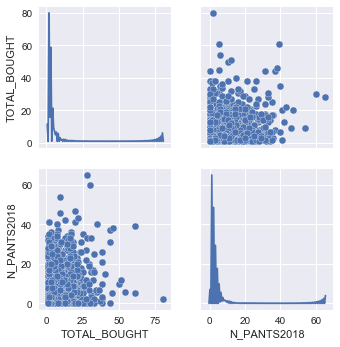

In [23]:
fts = [NUMERIC_FTS[0]]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

ERROR! Session/line number was not unique in database. History logging moved to new session 758


,SHIPPED_SOLD_AMT,AVG_SHIPPED_SOLD_AMT,STD_SHIPPED_SOLD_AMT,VAR_SHIPPED_SOLD_AMT,N_PANTS2018
SHIPPED_SOLD_AMT,1.000000,0.276839,0.238606,0.137346,0.279637
AVG_SHIPPED_SOLD_AMT,0.276839,1.000000,0.104231,0.085807,0.004038
STD_SHIPPED_SOLD_AMT,0.238606,0.104231,1.000000,0.917460,0.063679
VAR_SHIPPED_SOLD_AMT,0.137346,0.085807,0.917460,1.000000,0.022167
N_PANTS2018,0.279637,0.004038,0.063679,0.022167,1.000000


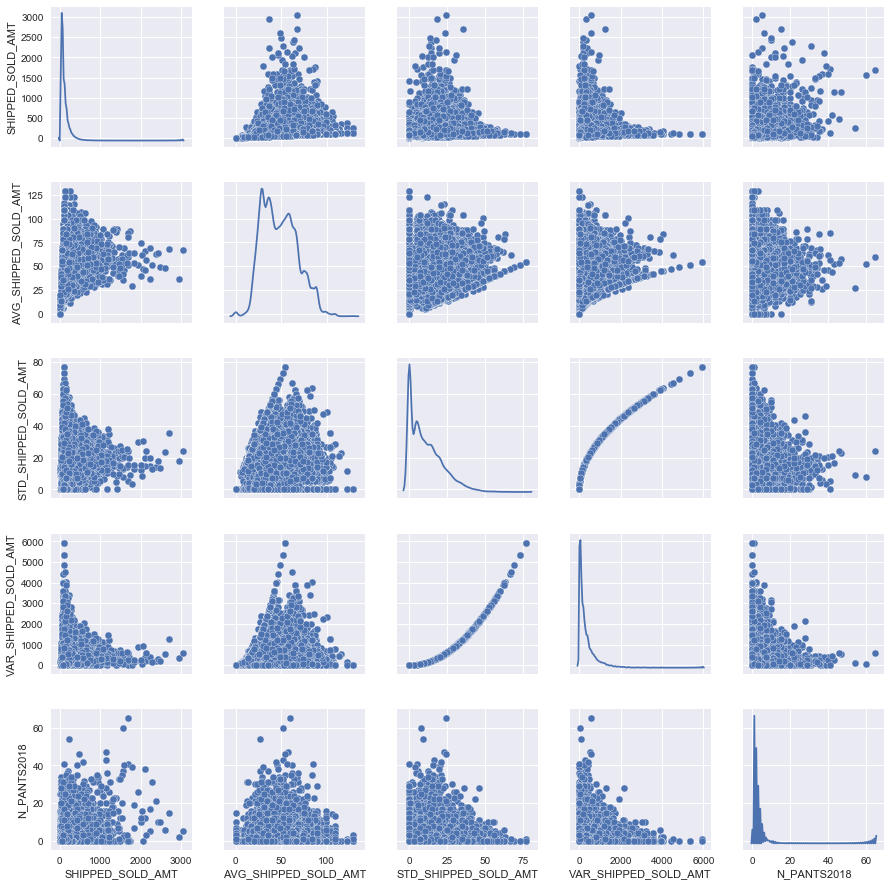

In [11]:
fts = NUMERIC_FTS[1:5]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,DISCOUNT,AVG_DISCOUNT,STD_DISCOUNT,VAR_DISCOUNT,N_PANTS2018
DISCOUNT,1.000000,0.428067,0.210762,0.102734,0.264700
AVG_DISCOUNT,0.428067,1.000000,0.105654,0.070157,0.037794
STD_DISCOUNT,0.210762,0.105654,1.000000,0.913231,0.080368
VAR_DISCOUNT,0.102734,0.070157,0.913231,1.000000,0.037776
N_PANTS2018,0.264700,0.037794,0.080368,0.037776,1.000000


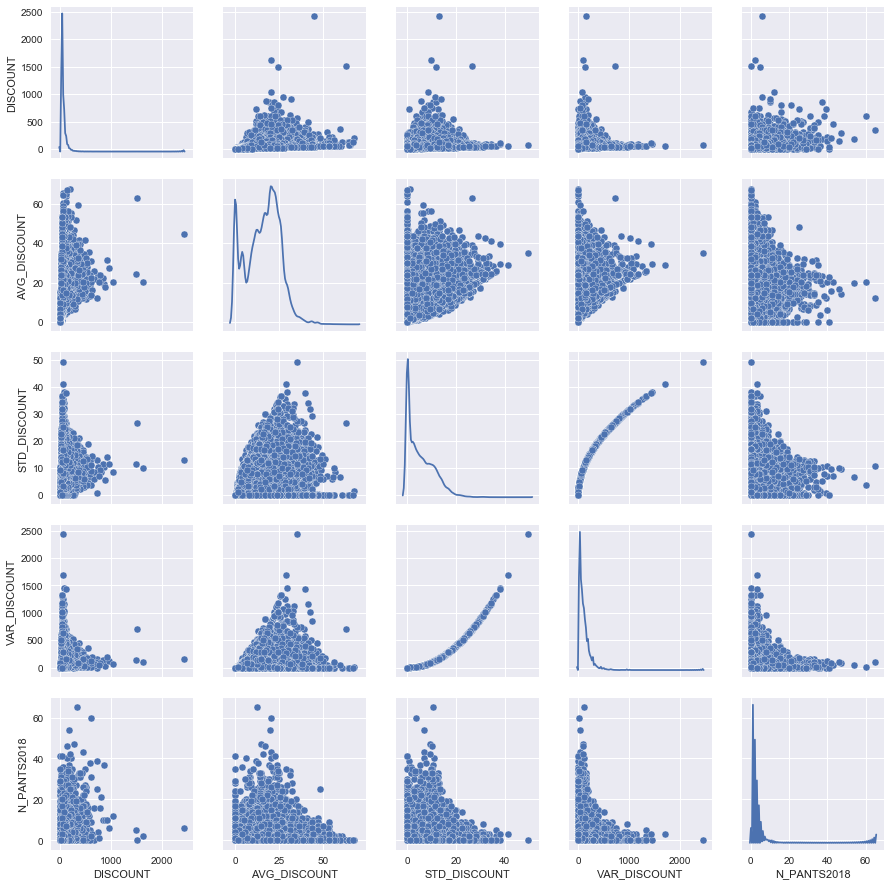

In [12]:
fts = NUMERIC_FTS[5:]
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

## Categorical Fts Correlation/Scatter Matrix

In [13]:
#fts = CATEG_FTS[0:3]+['N_PANTS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DFPants,vars=fts,diag_kind='kde');

In [14]:
#fts = CATEG_FTS[3:6]+['N_PANTS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DFPants,vars=fts,diag_kind='kde');

In [15]:
#fts = CATEG_FTS[6:9]+['N_PANTS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DFPants,vars=fts,diag_kind='kde');

In [16]:
#fts = CATEG_FTS[9:12]+['N_PANTS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DFPants,vars=fts,diag_kind='kde');

In [17]:
#fts = CATEG_FTS[12:15]+['N_PANTS2018']
#display(DFPants[fts].corr())
#g = sns.pairplot(DFPants,vars=fts,diag_kind='kde',size=4);

,ENDUSE_%_CORE,ENDUSE_%_WEAREVER,ENDUSE_%_PUREJILL,N_PANTS2018
ENDUSE_%_CORE,1.000000,-0.546832,-0.753566,-0.010661
ENDUSE_%_WEAREVER,-0.546832,1.000000,-0.138307,-0.011333
ENDUSE_%_PUREJILL,-0.753566,-0.138307,1.000000,0.021515
N_PANTS2018,-0.010661,-0.011333,0.021515,1.000000


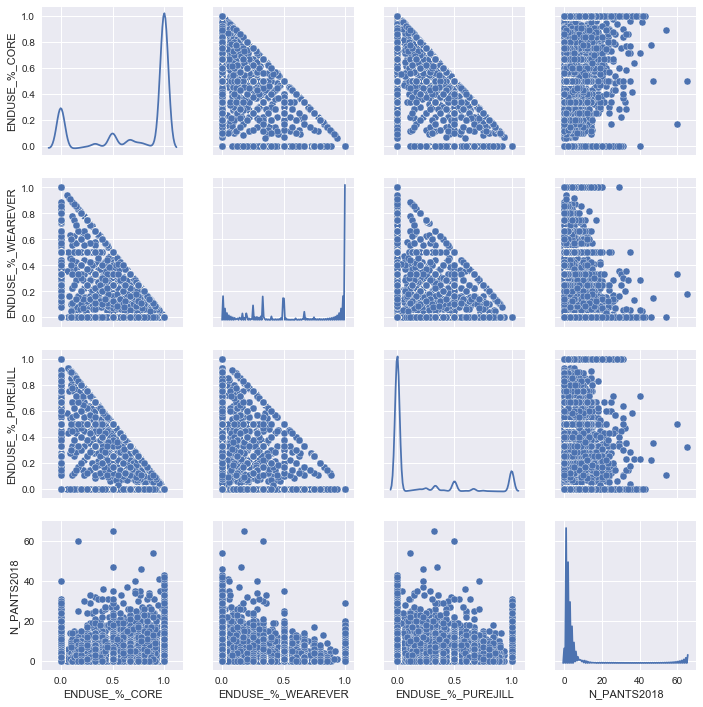

In [18]:
fts = CATEG_FTS[15:18]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,PAYTYPE_%_JJC,PAYTYPE_%_VISA,PAYTYPE_%_MC,N_PANTS2018
PAYTYPE_%_JJC,1.000000,-0.600333,-0.324391,0.112600
PAYTYPE_%_VISA,-0.600333,1.000000,-0.190772,-0.073275
PAYTYPE_%_MC,-0.324391,-0.190772,1.000000,-0.037430
N_PANTS2018,0.112600,-0.073275,-0.037430,1.000000


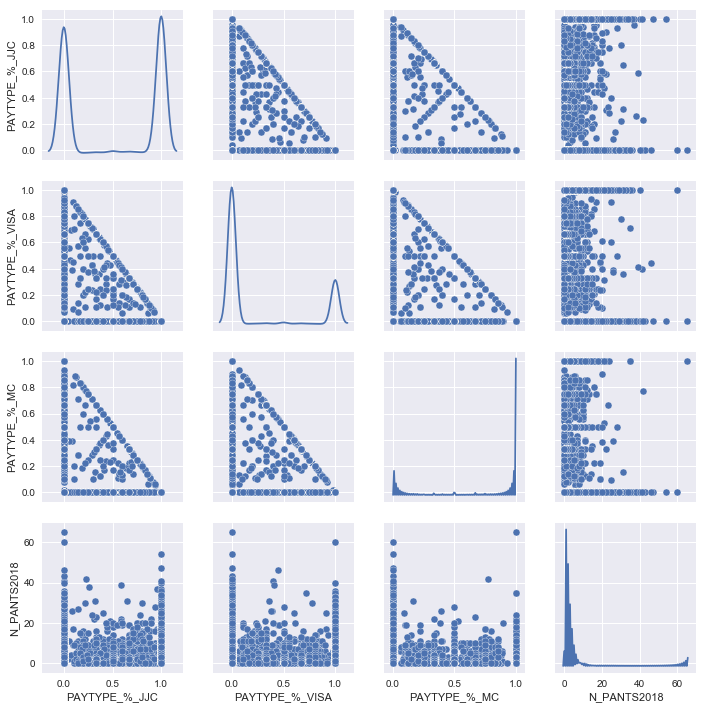

In [19]:
fts = CATEG_FTS[18:21]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,PAYTYPE_%_AMEX,PAYTYPE_%_DISC,PAYTYPE_%_DEBIT,N_PANTS2018
PAYTYPE_%_AMEX,1.000000,-0.035535,-0.045331,-0.008504
PAYTYPE_%_DISC,-0.035535,1.000000,-0.024746,-0.018201
PAYTYPE_%_DEBIT,-0.045331,-0.024746,1.000000,-0.026466
N_PANTS2018,-0.008504,-0.018201,-0.026466,1.000000


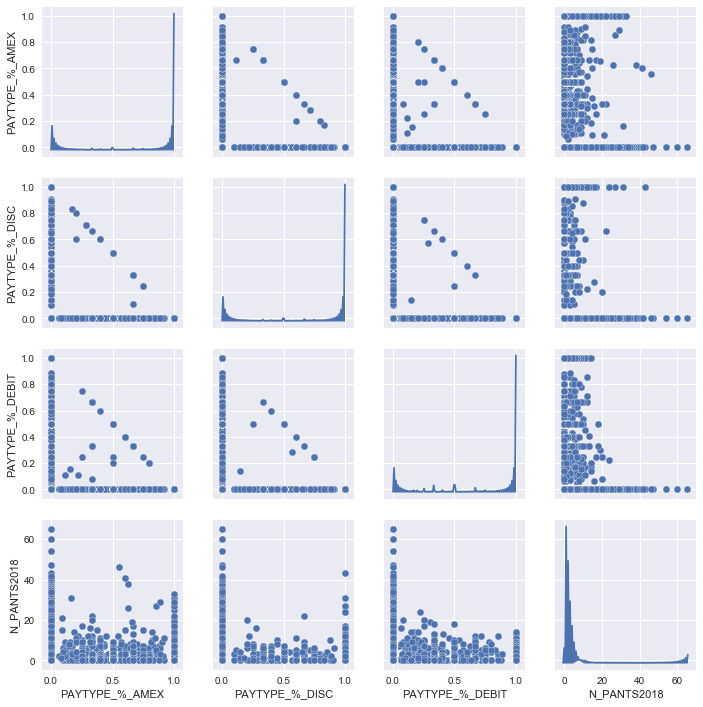

In [20]:
fts = CATEG_FTS[21:24]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,PAYTYPE_%_CASH,PAYTYPE_%_CK,PAYTYPE_%_OTHER,N_PANTS2018
PAYTYPE_%_CASH,1.000000,0.000119,-0.012240,-0.018154
PAYTYPE_%_CK,0.000119,1.000000,-0.003360,-0.000606
PAYTYPE_%_OTHER,-0.012240,-0.003360,1.000000,-0.018096
N_PANTS2018,-0.018154,-0.000606,-0.018096,1.000000


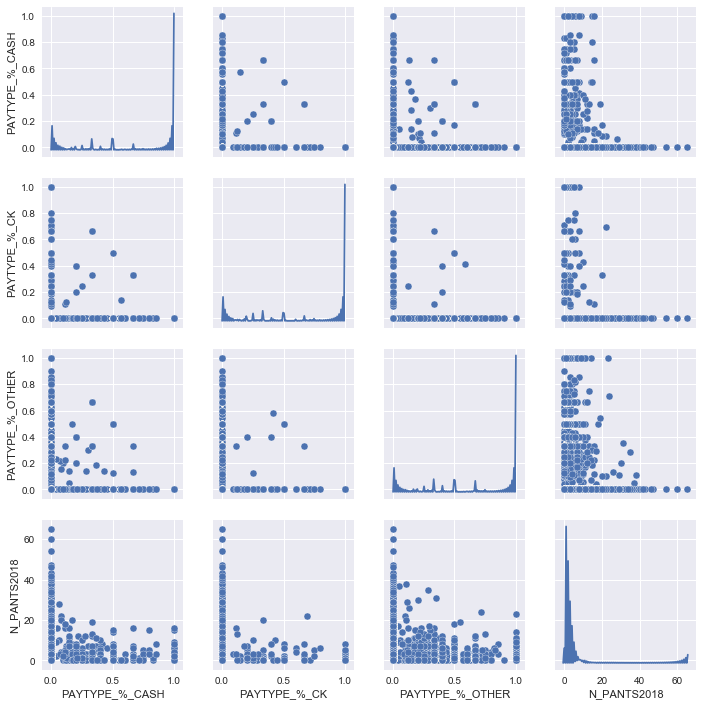

In [21]:
fts = CATEG_FTS[24:27]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde');

,FABRICCATEGORY_%_COTTON/COTTONBL,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,FABRICCATEGORY_%_LINEN/LINENBL,N_PANTS2018
FABRICCATEGORY_%_COTTON/COTTONBL,1.000000,-0.333626,-0.229549,0.032382
FABRICCATEGORY_%_SYNTHETIC/SYNBLEND,-0.333626,1.000000,-0.078007,-0.010405
FABRICCATEGORY_%_LINEN/LINENBL,-0.229549,-0.078007,1.000000,-0.008064
N_PANTS2018,0.032382,-0.010405,-0.008064,1.000000


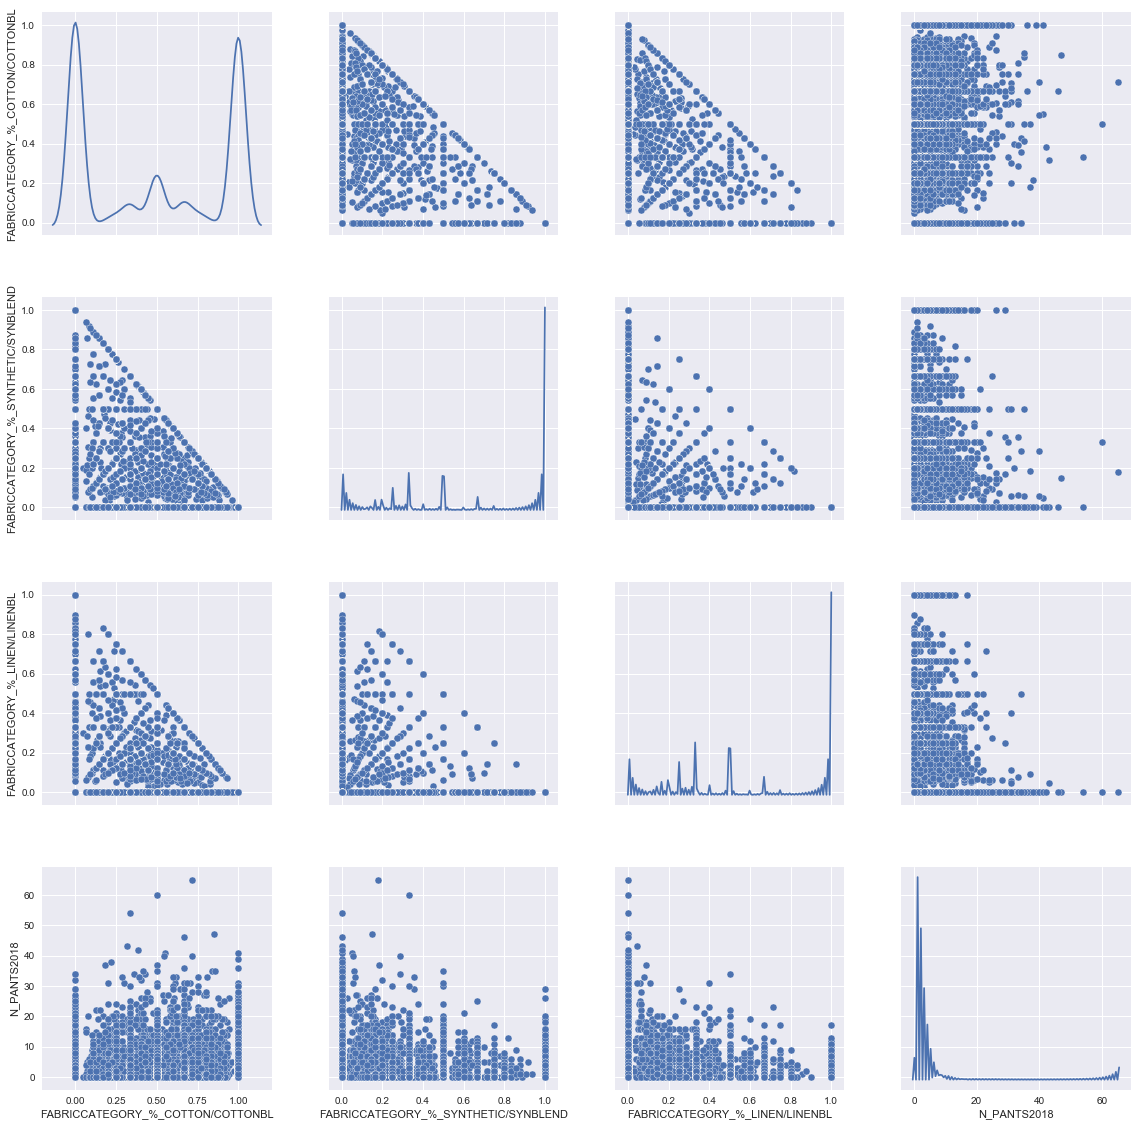

In [22]:
fts = CATEG_FTS[27:30]+['N_PANTS2018']
display(DFPants[fts].corr())
sns.pairplot(DFPants[:100000],vars=fts,diag_kind='kde',size=4);